# Author: Muhammad Osama Khan

# The Sparks Foundation. Data Science & Business Analytics Intern

## Task 1: Prediction Using Supervised ML

#### Predict the percentage of an student based on the number of study hours.

# Importing Libraries 

In [37]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Load and Read data

In [5]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data Loaded")

data.head(4)

Data Loaded


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


# Visualizing Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


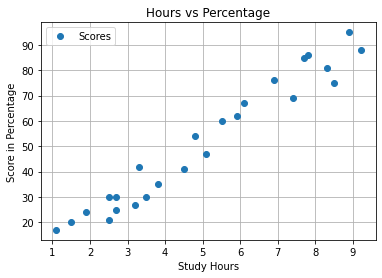

In [9]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Study Hours')  
plt.ylabel('Score in Percentage')  
plt.grid()
plt.show()


# 

# Preparing data and Splitting

In [10]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [11]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


# Training using Linear regression

In [18]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training done!")

Training done!


# Plotting 

Slope of line is: [9.91065648]
Intercept is: 2.018160041434683


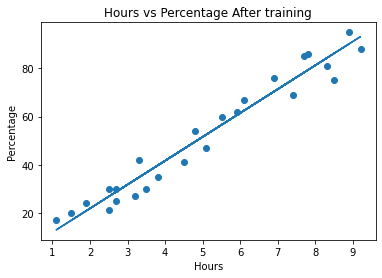

In [22]:
# Plotting the regression line
m=regressor.coef_
c=regressor.intercept_
#line equation
line=m*x+c
print("Slope of line is:",m)
print("Intercept is:",c)
# Plotting for the test data
plt.title('Hours vs Percentage After training')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# Checking Training and Testing Accuracy

In [25]:
print("Training:",regressor.score(x_train,y_train))
print("Testing:",regressor.score(x_test,y_test))

Training: 0.9515510725211552
Testing: 0.9454906892105356


# Making Prediction

In [26]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [27]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

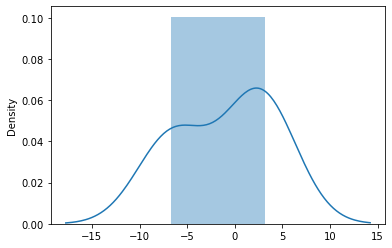

In [38]:
sns.distplot(np.array(y_test-y_pred))

# Testing data

In [ ]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict(np.array([9.25]).reshape(1, -1))

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

# Evaluating Model

In [41]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


# Conclusion

##### Model predicts Student who study 9.25 hours a day his/her score to be 0.9454906892105356